In [1]:
import pickle
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_max_pool
from torch_geometric.data import Batch
from torch_geometric.loader import DataLoader
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(30, 256)
        self.conv2 = GCNConv(256, 256)
        self.conv3 = GCNConv(256, 256)
        self.conv4 = GCNConv(256, 256)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = global_max_pool(x, data.batch)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [3]:
def custom_collate(batch):
    data_list, target_list = zip(*batch)
    batch_data = Batch.from_data_list(data_list)
    batch_target = torch.stack(target_list)
    return batch_data, batch_target

Dataset :  AI
Epoch 1, Validation Loss: 0.5481754070007401
Epoch 2, Validation Loss: 0.2406718082918288
Epoch 3, Validation Loss: 0.22956007039907814
Epoch 4, Validation Loss: 0.1372150767782962
Epoch 5, Validation Loss: 0.12859682130841366
Epoch 6, Validation Loss: 0.14100678422918134
Epoch 7, Validation Loss: 0.11751059742788932
Epoch 8, Validation Loss: 0.10330117885612439
Epoch 9, Validation Loss: 0.09240915293841181
Epoch 10, Validation Loss: 0.09422783954003776
Epoch 11, Validation Loss: 0.11381906004874087
Epoch 12, Validation Loss: 0.08628432509191877
Epoch 13, Validation Loss: 0.1023664846625794
Epoch 14, Validation Loss: 0.09667125638631922
Epoch 15, Validation Loss: 0.0967494901578416
Epoch 16, Validation Loss: 0.10506379943167499
Epoch 17, Validation Loss: 0.09641136787259845
Epoch 18, Validation Loss: 0.08843664365156163
Epoch 19, Validation Loss: 0.0840225145054803
Epoch 20, Validation Loss: 0.07128645029081244
Epoch 21, Validation Loss: 0.0694857135597312
Epoch 22, Valid

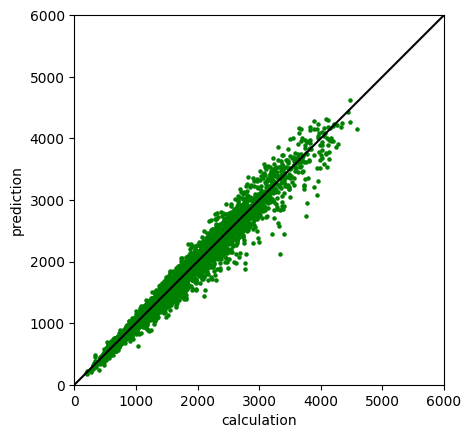

Dataset :  AI2
Epoch 1, Validation Loss: 0.42808268179680936
Epoch 2, Validation Loss: 0.25687624958874566
Epoch 3, Validation Loss: 0.19118609009574278
Epoch 4, Validation Loss: 0.1598414818863217
Epoch 5, Validation Loss: 0.14518569088889585
Epoch 6, Validation Loss: 0.14716894871206535
Epoch 7, Validation Loss: 0.1098025373371194
Epoch 8, Validation Loss: 0.10645941946583419
Epoch 9, Validation Loss: 0.09847167802209313
Epoch 10, Validation Loss: 0.09216460032045787
Epoch 11, Validation Loss: 0.09024829848870414
Epoch 12, Validation Loss: 0.08088595196154615
Epoch 13, Validation Loss: 0.07629762541508313
Epoch 14, Validation Loss: 0.09466122467600475
Epoch 15, Validation Loss: 0.08875330116394066
Epoch 16, Validation Loss: 0.06939645656024147
Epoch 17, Validation Loss: 0.0662519457862883
Epoch 18, Validation Loss: 0.06243897697048072
Epoch 19, Validation Loss: 0.060359366173388856
Epoch 20, Validation Loss: 0.060199167225792126
Epoch 21, Validation Loss: 0.060007557395809985
Epoch 2

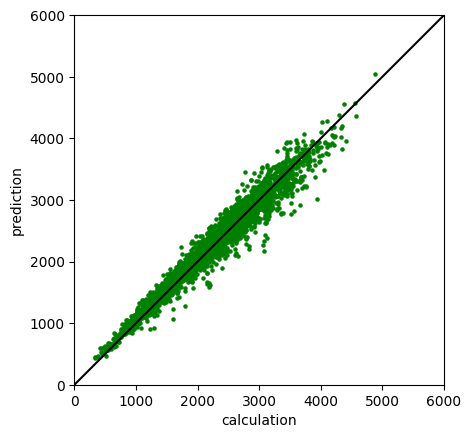

Dataset :  Random
Epoch 1, Validation Loss: 0.3409611050531121
Epoch 2, Validation Loss: 0.2945737892787346
Epoch 3, Validation Loss: 0.15028820680056654
Epoch 4, Validation Loss: 0.1377987265329566
Epoch 5, Validation Loss: 0.11887611654600447
Epoch 6, Validation Loss: 0.0977335811035009
Epoch 7, Validation Loss: 0.10102115631707632
Epoch 8, Validation Loss: 0.08769339433456401
Epoch 9, Validation Loss: 0.07717318320756572
Epoch 10, Validation Loss: 0.0731053931654567
Epoch 11, Validation Loss: 0.06929420751907744
Epoch 12, Validation Loss: 0.06761767516167402
Epoch 13, Validation Loss: 0.08692331029462319
Epoch 14, Validation Loss: 0.08076478584170552
Epoch 15, Validation Loss: 0.06565067038147765
Epoch 16, Validation Loss: 0.06440569525746502
Epoch 17, Validation Loss: 0.060639416359710624
Epoch 18, Validation Loss: 0.059466198832184666
Epoch 19, Validation Loss: 0.059815568313976816
Epoch 20, Validation Loss: 0.05846553518896578
Epoch 21, Validation Loss: 0.06183123069755418
Epoch 

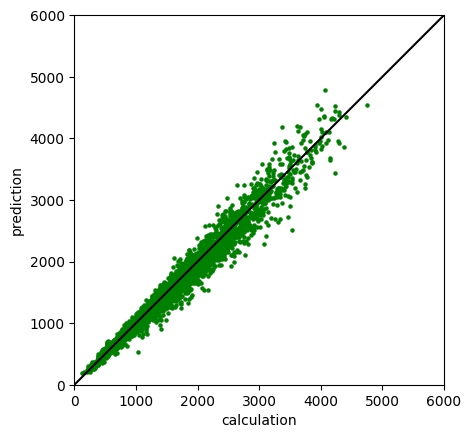

Dataset :  Human
Epoch 1, Validation Loss: 0.3656754172193343
Epoch 2, Validation Loss: 0.5006346679644338
Epoch 3, Validation Loss: 0.25241564653830195
Epoch 4, Validation Loss: 0.2162220497970057
Epoch 5, Validation Loss: 0.0997363902885931
Epoch 6, Validation Loss: 0.06340721997967491
Epoch 7, Validation Loss: 0.057970129034008194
Epoch 8, Validation Loss: 0.040649207402065735
Epoch 9, Validation Loss: 0.03324198056004215
Epoch 10, Validation Loss: 0.02895663159004195
Epoch 11, Validation Loss: 0.023123072499765578
Epoch 12, Validation Loss: 0.019654936031960394
Epoch 13, Validation Loss: 0.017246990123435002
Epoch 14, Validation Loss: 0.015623936349013039
Epoch 15, Validation Loss: 0.014418903782541315
Epoch 16, Validation Loss: 0.012948012192480962
Epoch 17, Validation Loss: 0.011819935215905892
Epoch 18, Validation Loss: 0.010489014446824914
Epoch 19, Validation Loss: 0.011946708203158149
Epoch 20, Validation Loss: 0.010074758408534674
Epoch 21, Validation Loss: 0.009419691436770

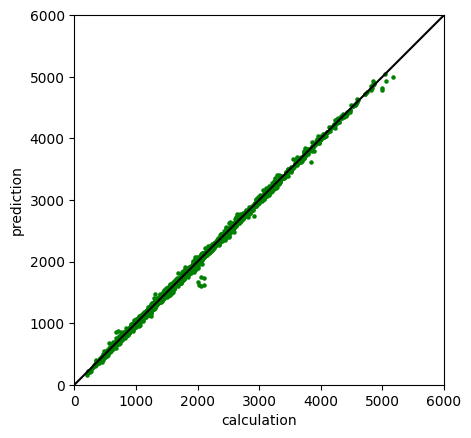

In [4]:
torch.manual_seed(0)

target_data = "bertzct"
scaler = StandardScaler()
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
    
for d in ["AI", "AI2", "Random", "Human"]:
    torch.manual_seed(0)
    print('Dataset : ', d)
    dataset = d

    with open(f'data_{dataset}/data_train_list.pkl', 'rb') as f:
        data_train_list = pickle.load(f)
    with open(f'data_{dataset}/data_val_list.pkl', 'rb') as f:
        data_val_list = pickle.load(f)
    with open(f'data_{dataset}/data_test_list.pkl', 'rb') as f:
        data_test_list = pickle.load(f)
    with open(f'data_{dataset}/target_train_{target_data}.pkl', 'rb') as f:
        target_train = pickle.load(f)
    with open(f'data_{dataset}/target_val_{target_data}.pkl', 'rb') as f:
        target_val = pickle.load(f)
    with open(f'data_{dataset}/target_test_{target_data}.pkl', 'rb') as f:
        target_test = pickle.load(f)
        
    target_train = scaler.fit_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_val = scaler.transform(np.array(target_val).reshape(-1, 1)).flatten()
    target_test = scaler.transform(np.array(target_test).reshape(-1, 1)).flatten()
    target_train = torch.tensor(target_train, dtype=torch.float32)
    target_val = torch.tensor(target_val, dtype=torch.float32)
    target_test = torch.tensor(target_test, dtype=torch.float32)

    train_loader = DataLoader(list(zip(data_train_list, target_train)), batch_size=128, collate_fn=custom_collate)
    val_loader = DataLoader(list(zip(data_val_list, target_val)), batch_size=128, collate_fn=custom_collate)
    test_loader = DataLoader(list(zip(data_test_list, target_test)), batch_size=128, collate_fn=custom_collate)

    model = Net().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    early_stopping_patience = 30
    best_val_loss = float('inf')
    patience_counter = 0

    loss_train = []
    for epoch in range(100):
        model.train()
        for data, target in train_loader:
            data = data.to(device)
            target = target.to(device)
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, target.view(-1, 1))
            loss.backward()
            optimizer.step()
            loss_train.append(loss.item())
        
        model.eval()
        val_loss = 0
        total_size = 0
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                target = target.to(device)
                out = model(data)
                loss = criterion(out, target.view(-1, 1))
                val_loss += loss.item() * data.size(0)
                total_size += data.size(0)
        val_loss /= total_size
        
        print(f'Epoch {epoch+1}, Validation Loss: {val_loss}')
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            torch.save(model.state_dict(), f'data_{dataset}/model_{dataset}_sc.pth')
        else:
            patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    model.load_state_dict(torch.load(f'data_{dataset}/model_{dataset}_sc.pth'))
    model.eval()
    
    pred_train = []
    for data, target in train_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_train.append(out.cpu().numpy())
    pred_train = np.concatenate(pred_train)

    pred_test = []
    for data, target in test_loader:
        data = data.to(device)
        with torch.no_grad():
            out = model(data)
        pred_test.append(out.cpu().numpy())
    pred_test = np.concatenate(pred_test)

    pred_train = scaler.inverse_transform(pred_train)
    pred_test = scaler.inverse_transform(pred_test)
    target_train = scaler.inverse_transform(np.array(target_train).reshape(-1, 1)).flatten()
    target_test = scaler.inverse_transform(np.array(target_test).reshape(-1, 1)).flatten()

    print('R2 train:', metrics.r2_score(target_train, pred_train))
    print('R2 test:', metrics.r2_score(target_test, pred_test))
    
    n = 6000
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(range(0, n+1), range(0, n+1), c='black')
    plt.scatter(target_test, pred_test, c='green', s=5)
    plt.xlim(0, n)
    plt.ylim(0, n)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel("calculation")
    plt.ylabel("prediction")
    plt.show()
    fig.savefig(f'data_{dataset}/source_sc.pdf')
    print('======================================================')